# Coursera Capstone – “School-Classification” #

# Introduction #
#### In today’s world, it is a headache for parents to decide which school is good for their children. It is very important for a child to have his/her education at a better place so that he/she should be influence by bad things nearby. The mission of this project is to use Foursquare location data and regional clustering of venue information to determine what might be the ‘best’ school in York for a child. My proposal, then, is an analysis of the neighborhoods of schools in York for the consideration of safe place for children. The objective is to evaluate the neighborhoods of schools and analyses whether there is any venue nearby which can be harmful for a child. ####
#### This project will be interesting for parents those are willing to send their children to school and yet little bit of confuse about which school will be safe for their children. ####

 


### Data ###

<https://data.gov.uk/dataset/3c08b949-da02-40f5-9cb6-3a5be2b3116d/list-of-schools-in-york>

#### The data that we will use for this analysis is a combination of a CSV file that has been prepared for the purposes of the analysis from multiple sources (schoolslist.csv) and the location/venue information in foursquare. Schoolslist.csv has list of schools in York  along with their latitude and longitude. Using foursquare APIs, we can get the details and category of the neighborhood venues ####

### Data importing and data cleaning ###

In [27]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\UttamKumar\Desktop\course\coursera\schoolslist.csv")
df.drop(['DfENumber', 'SchoolType' , 'SchoolPhase' , 'SchoolType' , 'Telephone' , 'Email' , 'WebsiteAddress' , 'AgeRange' , 'Nursery' , 'OpeningHours' , 'Headteacher' , 'PupilCount' , 'Ward'], axis=1, inplace=True)
df[['lat','log']] = df['Location'].str.split(',',expand=True)

df.drop('Location', axis=1, inplace=True)

df.dropna(subset= ['lat','log'], inplace=True)
df['lat'] = pd.to_numeric(df['lat'])
df['log'] = pd.to_numeric(df['log'])
df.head()

,SchoolName,Address,Postcode,lat,log
0,Acomb Primary School,"West Bank, York",YO24 4ES,53.953270,-1.114962
1,All Saints Roman Catholic School,"Nunnery Lane, York and Mill Mount Lane, York",YO23 1JG and YO24 1BJ,53.955075,-1.091037
2,Applefields School,"Bad Bargain Lane, York",YO31 0LW,53.965099,-1.045976
3,Archbishop Holgate's Church of England School,"Hull Road, York",YO10 5ZA,53.952866,-1.040225
4,Archbishop of York's CE Junior School,"Copmanthorpe Lane, Bishopthorpe, York",YO23 2QT,53.920855,-1.101686


### Importing python libraries for modelling and visualosation of data ###

In [59]:
import json
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
import requests
address = 'York'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of  york are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  york are 53.9590555, -1.0815361.


### locating school coodinates on the map of York by using folium library ###

In [19]:
import folium
map_1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['lat'], df['log'], df['SchoolName']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_1)  
    
map_1

### foursquare credentials details ###

In [20]:
CLIENT_ID = 'FA15FNJTVGJHXIOT41LFNUUTKAA3ZTCVJK2GA44X4LNJYCYJ' # your Foursquare ID
CLIENT_SECRET = 'FTGQCBOSCRRMT3RV0P0BNR3TKO1R5JPRJEBTETY553OVYD20' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FA15FNJTVGJHXIOT41LFNUUTKAA3ZTCVJK2GA44X4LNJYCYJ
CLIENT_SECRET:FTGQCBOSCRRMT3RV0P0BNR3TKO1R5JPRJEBTETY553OVYD20


### function for getting the name, latitude, longitude and category of the nearby schools ###

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['School name', 
                  'school Latitude', 
                  'School Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:


venues = getNearbyVenues(names=df['SchoolName'],
                                   latitudes=df['lat'],
                                   longitudes=df['log']
                                  )



Acomb Primary School
All Saints Roman Catholic School
Applefields School
Archbishop Holgate's Church of England School
Archbishop of York's CE Junior School
Badger Hill Primary School
Bishopthorpe Infant School
Burton Green Primary School
Carr Infant School
Carr Junior School
Clifton Green Primary School
Clifton with Rawcliffe Primary School
Copmanthorpe Primary School
Dringhouses Primary School
Dunnington CE Primary School
Elvington CE Primary School
Fishergate Primary School
Fulford School
Haxby Road Primary Academy
Headlands Primary School
Hempland Primary School
Heworth Church of England Primary School
Hob Moor Community Primary School
Hob Moor Oaks School
Huntington Primary Academy
Huntington School
Joseph Rowntree School
Knavesmire Primary School
Lakeside Primary School
Lord Deramore's Primary School
Manor Church of England Academy
Millthorpe School
Naburn CE Primary School
New Earswick Primary School
Osbaldwick Primary School
Our Lady Queen of Martyrs Roman Catholic Primary Scho

### list of unique venue categories ###

In [34]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 88 uniques categories.


In [35]:
pd.unique(venues[['Venue Category']].values.ravel('K'))

array(['History Museum', 'Park', 'Sports Club', 'Fast Food Restaurant',
       'Historic Site', 'Trail', 'Tapas Restaurant', 'Pub', 'Brewery',
       'Hostel', 'Thai Restaurant', 'Hotel', 'English Restaurant',
       'Beer Bar', 'Bar', 'Italian Restaurant', 'Breakfast Spot',
       'Indian Restaurant', 'Train Station', 'Turkish Restaurant',
       'Restaurant', 'Café', 'Nightclub', 'Chinese Restaurant',
       'Cocktail Bar', 'Coffee Shop', 'Movie Theater', 'Bakery',
       'Gym / Fitness Center', 'Convenience Store', 'Playground',
       'Pizza Place', 'Botanical Garden', 'Sporting Goods Shop',
       'Grocery Store', 'Bus Line', 'Soccer Stadium', 'Hotel Bar',
       'Bed & Breakfast', 'Cupcake Shop', 'Sandwich Place',
       'Fish & Chips Shop', 'Construction & Landscaping', 'Gym',
       'Pharmacy', 'Financial or Legal Service', 'Castle', 'Concert Hall',
       'Gastropub', 'Beer Garden', 'Office', 'Plaza', 'Theater',
       'Gym Pool', 'Bus Stop', 'Home Service', 'Deli / Bodega',
 

### Data preprocessing ###

In [36]:
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
onehot.head()

,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,...,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
onehot.drop(['Bakery', 'Bowling Alley','Bus Line', 'Bus Stop', 'Café', 'Candy Store', 'Convenience Store','Deli / Bodega','Diner', 'Financial or Legal Service', 'Outdoor Supply Store','Plaza','Train Station', 'Theater','Arts & Entertainment', 'Athletics & Sports', 'Botanical Garden', 'Castle', 'Church','Coffee Shop', 'Garden', 'Gym', 'Gym / Fitness Center', 'Gym Pool', 'Historic Site', 'History Museum','Hostel','Lake', 'Museum', 'Music Store', 'Nature Preserve','Paper / Office Supplies Store', 'Park', 'Pharmacy','Playground','Soccer Stadium', 'Sporting Goods Shop', 'Sports Club','Asian Restaurant', 'Bed & Breakfast','Breakfast Spot',  'Business Service', 'Chinese Restaurant',  'Cupcake Shop','English Restaurant', 'Fish & Chips Shop', 'Food & Drink Shop', 'French Restaurant','Grocery Store', 'Home Service','Indian Restaurant', 'Italian Restaurant', 'Movie Theater', 'Other Repair Shop',  'Pizza Place','Restaurant', 'Sandwich Place', 'Supermarket', 'Tapas Restaurant', 'Tea Room', 'Thai Restaurant', 'Trail', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant' , 'Pet Store'], axis=1, inplace=True )

In [38]:
onehot.columns

Index(['Bar', 'Beach', 'Beer Bar', 'Beer Garden', 'Beer Store', 'Brewery',
       'Cocktail Bar', 'Concert Hall', 'Construction & Landscaping',
       'Fast Food Restaurant', 'Food Truck', 'Gastropub', 'Hotel', 'Hotel Bar',
       'Nightclub', 'Office', 'Pool', 'Pub', 'Racecourse', 'Racetrack',
       'Sports Bar', 'Wine Bar', 'Wine Shop'],
      dtype='object')

In [39]:
onehot.head()


,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Brewery,Cocktail Bar,Concert Hall,Construction & Landscaping,Fast Food Restaurant,...,Hotel Bar,Nightclub,Office,Pool,Pub,Racecourse,Racetrack,Sports Bar,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df1=onehot.mul(10, axis = 0)

df1['School Name'] = venues['School name']
fixed_columns = [df1.columns[-1]] + list(df1.columns[:-1])
df1 = df1[fixed_columns]
df1.head()

,School Name,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Brewery,Cocktail Bar,Concert Hall,Construction & Landscaping,...,Hotel Bar,Nightclub,Office,Pool,Pub,Racecourse,Racetrack,Sports Bar,Wine Bar,Wine Shop
0,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,All Saints Roman Catholic School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df1['mean'] = df1.mean(axis=1)
df1.head()


,School Name,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Brewery,Cocktail Bar,Concert Hall,Construction & Landscaping,...,Nightclub,Office,Pool,Pub,Racecourse,Racetrack,Sports Bar,Wine Bar,Wine Shop,mean
0,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.434783
4,All Saints Roman Catholic School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [42]:
df1['Safe'] = np.where(df1['mean']<=0.40, 'yes', 'no')

In [43]:
df1.head()

,School Name,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Brewery,Cocktail Bar,Concert Hall,Construction & Landscaping,...,Office,Pool,Pub,Racecourse,Racetrack,Sports Bar,Wine Bar,Wine Shop,mean,Safe
0,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,yes
1,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,yes
2,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,yes
3,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.434783,no
4,All Saints Roman Catholic School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,yes


### traning and testing SVM classification model ###

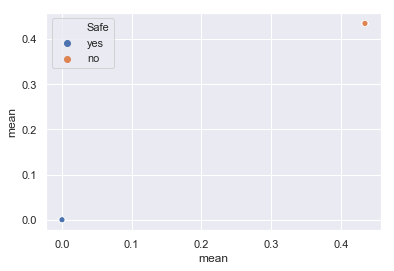

In [58]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="mean", y="mean", hue="Safe", data=df1)

In [44]:
X = df1[['mean']].values
y = df1[['Safe']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
from sklearn.metrics import jaccard_similarity_score
yhat = clf.predict(X_test)
jaccard_similarity_score(y_test, yhat)


Train set: (342, 1) (342, 1)
Test set: (86, 1) (86, 1)


C:\Users\UttamKumar\Anaconda3\envs\mlcc\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [45]:
df1['colour'] = np.where(df1['Safe']=='yes', 'green', 'blue')
df1.head()

,School Name,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Brewery,Cocktail Bar,Concert Hall,Construction & Landscaping,...,Pool,Pub,Racecourse,Racetrack,Sports Bar,Wine Bar,Wine Shop,mean,Safe,colour
0,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,yes,green
1,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,yes,green
2,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,yes,green
3,Acomb Primary School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.434783,no,blue
4,All Saints Roman Catholic School,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,yes,green


### classifying the schools and locating them on the York map ###

In [46]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
#x = np.arange(2)
#ys = [i + x + (i*x)**2 for i in range(2)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, c in zip(df['lat'], df['log'],df1['School Name'], df1['Safe'], df1['colour'] ):
    label = folium.Popup(str(poi) + ' safety ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color=c,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Result ##
#### From the above result, it shows some schools with green color and some schools with blue color. By using SVM linear model, I have classified all the unsafe schools by labelling them with blue color and all the schools with green color label are safe for children as there is no harmful venue around the school. ####